In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
client = MongoClient()
db = client['nfl']
clean_player = db['clean_player']

In [3]:
df = pd.DataFrame(list(clean_player.find({'position':'receiving'},{'_id':0})))

In [4]:
df.head()

,position,year,player_url,player,team,age,pos,g,gs,targets,...,rec_yds_per_rec,rec_td,rec_first_down,rec_long,rec_yds_per_tgt,rec_per_g,rec_yds_per_g,fumbles,heigh,weight
0,receiving,2005,/players/F/FitzLa00.htm,Larry Fitzgerald*,ARI,22,WR,16,16,165,...,13.7,10,68,47,8.5,6.4,88.1,0,6-3,218lb
1,receiving,2005,/players/S/SmitSt01.htm,Steve Smith*+,CAR,26,WR,16,16,150,...,15.2,12,72,80,10.4,6.4,97.7,2,5-9,195lb
2,receiving,2005,/players/B/BoldAn00.htm,Anquan Boldin,ARI,25,WR,14,14,171,...,13.7,7,69,54,8.2,7.3,100.1,2,6-1,220lb
3,receiving,2005,/players/H/HoltTo00.htm,Torry Holt*,STL,29,WR,14,14,163,...,13.0,9,63,44,8.2,7.3,95.1,2,6-0,200lb
4,receiving,2005,/players/J/JohnCh01.htm,Chad Johnson *+,CIN,27,WR,16,16,155,...,14.8,9,74,70,9.2,6.1,89.5,1,6-1,188lb


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6801 entries, 0 to 6800
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   position         6801 non-null   object
 1   year             6801 non-null   int64 
 2   player_url       6801 non-null   object
 3   player           6801 non-null   object
 4   team             6801 non-null   object
 5   age              6801 non-null   object
 6   pos              6801 non-null   object
 7   g                6801 non-null   object
 8   gs               6801 non-null   object
 9   targets          6801 non-null   object
 10  rec              6801 non-null   object
 11  catch_pct        6801 non-null   object
 12  rec_yds          6801 non-null   object
 13  rec_yds_per_rec  6801 non-null   object
 14  rec_td           6801 non-null   object
 15  rec_first_down   6801 non-null   object
 16  rec_long         6801 non-null   object
 17  rec_yds_per_tgt  6801 non-null   

All my data types seem to be messed up.  Will need to look into that and see why.

In [6]:
df.head()

,position,year,player_url,player,team,age,pos,g,gs,targets,...,rec_yds_per_rec,rec_td,rec_first_down,rec_long,rec_yds_per_tgt,rec_per_g,rec_yds_per_g,fumbles,heigh,weight
0,receiving,2005,/players/F/FitzLa00.htm,Larry Fitzgerald*,ARI,22,WR,16,16,165,...,13.7,10,68,47,8.5,6.4,88.1,0,6-3,218lb
1,receiving,2005,/players/S/SmitSt01.htm,Steve Smith*+,CAR,26,WR,16,16,150,...,15.2,12,72,80,10.4,6.4,97.7,2,5-9,195lb
2,receiving,2005,/players/B/BoldAn00.htm,Anquan Boldin,ARI,25,WR,14,14,171,...,13.7,7,69,54,8.2,7.3,100.1,2,6-1,220lb
3,receiving,2005,/players/H/HoltTo00.htm,Torry Holt*,STL,29,WR,14,14,163,...,13.0,9,63,44,8.2,7.3,95.1,2,6-0,200lb
4,receiving,2005,/players/J/JohnCh01.htm,Chad Johnson *+,CIN,27,WR,16,16,155,...,14.8,9,74,70,9.2,6.1,89.5,1,6-1,188lb


Convert height column to a float to make it easier to work with 

In [7]:
def height_to_float(x):
    feet, inch = x.split('-')
    return int(feet)+(int(inch)/12)


df['height_float'] = df.heigh.apply(height_to_float)

df.head()

,position,year,player_url,player,team,age,pos,g,gs,targets,...,rec_td,rec_first_down,rec_long,rec_yds_per_tgt,rec_per_g,rec_yds_per_g,fumbles,heigh,weight,height_float
0,receiving,2005,/players/F/FitzLa00.htm,Larry Fitzgerald*,ARI,22,WR,16,16,165,...,10,68,47,8.5,6.4,88.1,0,6-3,218lb,6.250000
1,receiving,2005,/players/S/SmitSt01.htm,Steve Smith*+,CAR,26,WR,16,16,150,...,12,72,80,10.4,6.4,97.7,2,5-9,195lb,5.750000
2,receiving,2005,/players/B/BoldAn00.htm,Anquan Boldin,ARI,25,WR,14,14,171,...,7,69,54,8.2,7.3,100.1,2,6-1,220lb,6.083333
3,receiving,2005,/players/H/HoltTo00.htm,Torry Holt*,STL,29,WR,14,14,163,...,9,63,44,8.2,7.3,95.1,2,6-0,200lb,6.000000
4,receiving,2005,/players/J/JohnCh01.htm,Chad Johnson *+,CIN,27,WR,16,16,155,...,9,74,70,9.2,6.1,89.5,1,6-1,188lb,6.083333


Lets fix the percent on the raios

In [9]:
df['catch_pct'] = df.catch_pct.apply(lambda x: x.replace('%',''))

It looks more like I need to recast the columns. There seems to be some empty values I need to check as well.

In [12]:
df.astype({'g':'float','gs':'float', 'rec':'float', 'catch_pct':'float', 
        'rec_yds':'float', 'rec_yds_per_rec':'float',
       'rec_td':'float', 'rec_first_down':'float', 'rec_long':'float', 
        'rec_yds_per_tgt':'float', 'rec_per_g':'float',
       'rec_yds_per_g':'float', 'fumbles':'float'})

ValueError: could not convert string to float: 

There seems to be issues with my data and some blank values.  I want to look into those issues.

In [13]:
for col in ['position', 'year', 'player_url', 'player', 'team', 'age', 'pos', 'g',
       'gs', 'targets', 'rec', 'catch_pct', 'rec_yds', 'rec_yds_per_rec',
       'rec_td', 'rec_first_down', 'rec_long', 'rec_yds_per_tgt', 'rec_per_g',
       'rec_yds_per_g', 'fumbles', 'heigh', 'weight']:
    try:
        df[col].astype('float')
    except: 
        print('error: {}'.format(col))

error: position
error: player_url
error: player
error: team
error: pos
error: targets
error: rec_yds_per_tgt
error: fumbles
error: heigh
error: weight


So there are data issues with these fields so I need to find and clean those first.

In [60]:
df[df.rec_yds_per_tgt == '']

,position,year,player_url,player,team,age,pos,g,gs,targets,...,rec_yds_per_rec,rec_td,rec_first_down,rec_long,rec_yds_per_tgt,rec_per_g,rec_yds_per_g,fumbles,heigh,weight
2473,receiving,2010,/players/W/WilsKr00.htm,Kris Wilson,SDG,29,te,14,7,,...,12.2,0,0,37,,0.4,5.2,1,6-2,245lb
2976,receiving,2011,/players/G/GateCl00.htm,Clyde Gates,MIA,25,,15,0,,...,9.5,0,1,11,,0.1,1.3,0,5-11,189lb
3470,receiving,2012,/players/H/HennCh01.htm,Chad Henne,JAX,27,qb,10,6,0,...,-6.0,0,0,-6,,0.1,-0.6,4,6-3,222lb
4392,receiving,2014,/players/J/JohnDa05.htm,David Johnson,SDG,27,,14,2,,...,4.0,0,0,4,,0.1,0.3,0,6-2,270lb
4406,receiving,2014,/players/R/RobiAl00.htm,Aldrick Robinson,2TM,26,,7,0,,...,6.0,0,0,6,,0.1,0.9,0,5-10,185lb


In [61]:
df[df.targets == '']

,position,year,player_url,player,team,age,pos,g,gs,targets,...,rec_yds_per_rec,rec_td,rec_first_down,rec_long,rec_yds_per_tgt,rec_per_g,rec_yds_per_g,fumbles,heigh,weight
2473,receiving,2010,/players/W/WilsKr00.htm,Kris Wilson,SDG,29,te,14,7,,...,12.2,0,0,37,,0.4,5.2,1,6-2,245lb
2976,receiving,2011,/players/G/GateCl00.htm,Clyde Gates,MIA,25,,15,0,,...,9.5,0,1,11,,0.1,1.3,0,5-11,189lb
4392,receiving,2014,/players/J/JohnDa05.htm,David Johnson,SDG,27,,14,2,,...,4.0,0,0,4,,0.1,0.3,0,6-2,270lb
4406,receiving,2014,/players/R/RobiAl00.htm,Aldrick Robinson,2TM,26,,7,0,,...,6.0,0,0,6,,0.1,0.9,0,5-10,185lb


In [62]:
df[df.fumbles == '']

,position,year,player_url,player,team,age,pos,g,gs,targets,...,rec_yds_per_rec,rec_td,rec_first_down,rec_long,rec_yds_per_tgt,rec_per_g,rec_yds_per_g,fumbles,heigh,weight
3408,receiving,2012,/players/C/Cox_Mi20.htm,Mike Cox,ATL,27,FB,8,7,3,...,7.3,0,1,11,7.3,0.4,2.8,,6-0,259lb


It looks like these are issues with under preforming players.  I am planning on removing players who do not play a lot so I will not have to worry much about this data.  Lets convet the fields we can first then do some EDA

In [14]:
df = df.astype({'age':'int', 'g':'float','gs':'float', 'rec':'float', 'catch_pct':'float', 
           'rec_yds':'float', 'rec_yds_per_rec':'float',
           'rec_td':'float', 'rec_first_down':'float', 'rec_long':'float', 
           'rec_per_g':'float', 'rec_yds_per_g':'float'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6801 entries, 0 to 6800
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   position         6801 non-null   object 
 1   year             6801 non-null   int64  
 2   player_url       6801 non-null   object 
 3   player           6801 non-null   object 
 4   team             6801 non-null   object 
 5   age              6801 non-null   int64  
 6   pos              6801 non-null   object 
 7   g                6801 non-null   float64
 8   gs               6801 non-null   float64
 9   targets          6801 non-null   object 
 10  rec              6801 non-null   float64
 11  catch_pct        6801 non-null   float64
 12  rec_yds          6801 non-null   float64
 13  rec_yds_per_rec  6801 non-null   float64
 14  rec_td           6801 non-null   float64
 15  rec_first_down   6801 non-null   float64
 16  rec_long         6801 non-null   float64
 17  rec_yds_per_tg

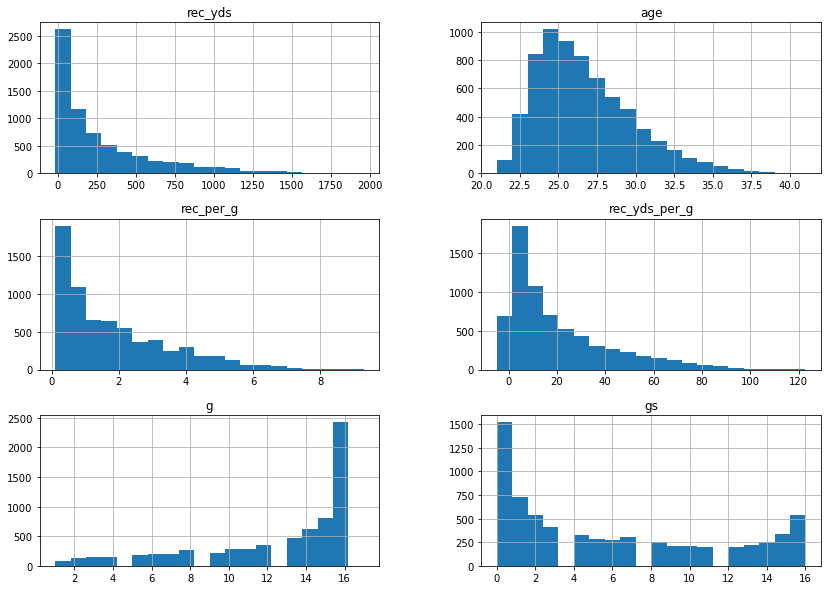

In [16]:
df[['rec_yds', 'age','rec_per_g', 'rec_yds_per_g', 'g', 'gs']].hist(bins = 20, figsize=(14,10));

In [79]:
df.rec_yds_per_g.min()

-5.0

Concerned about having negative yards on passing but realized that a pass that is behind the line of scrimmage and the recever is tackled would result in negative yards.  

The other thing that stand out to me is the number of player who are listed but do not seem to contribute. I want to see how things change if I only look at player who were in at least 12 games. 

In [17]:
df_more_than_12_games = df[df['g'] >= 12]

In [18]:
df_more_than_12_games.describe()

,year,age,g,gs,rec,catch_pct,rec_yds,rec_yds_per_rec,rec_td,rec_first_down,rec_long,rec_per_g,rec_yds_per_g,height_float
count,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000
mean,2012.005795,26.372612,14.966087,7.584889,30.233312,65.924297,349.492810,10.474995,2.153896,16.866710,34.531659,2.011655,23.157459,6.101774
std,4.312424,3.155793,1.312542,5.723356,26.019931,15.352316,348.372204,4.726891,2.728861,17.308458,20.784435,1.691076,22.670772,0.235344
min,2005.000000,21.000000,12.000000,0.000000,1.000000,0.000000,-15.000000,-15.000000,0.000000,0.000000,-15.000000,0.100000,-0.900000,5.416667
25%,2008.000000,24.000000,14.000000,2.000000,8.000000,56.000000,73.500000,7.600000,0.000000,3.000000,18.000000,0.600000,5.000000,5.916667
50%,2012.000000,26.000000,16.000000,7.000000,23.000000,65.400000,226.000000,10.400000,1.000000,11.000000,31.000000,1.600000,15.400000,6.083333
75%,2016.000000,28.000000,16.000000,13.000000,46.000000,74.600000,532.000000,13.000000,3.000000,26.000000,48.500000,3.100000,35.300000,6.250000
max,2019.000000,41.000000,17.000000,16.000000,149.000000,100.000000,1964.000000,66.000000,23.000000,93.000000,99.000000,9.300000,122.800000,6.750000


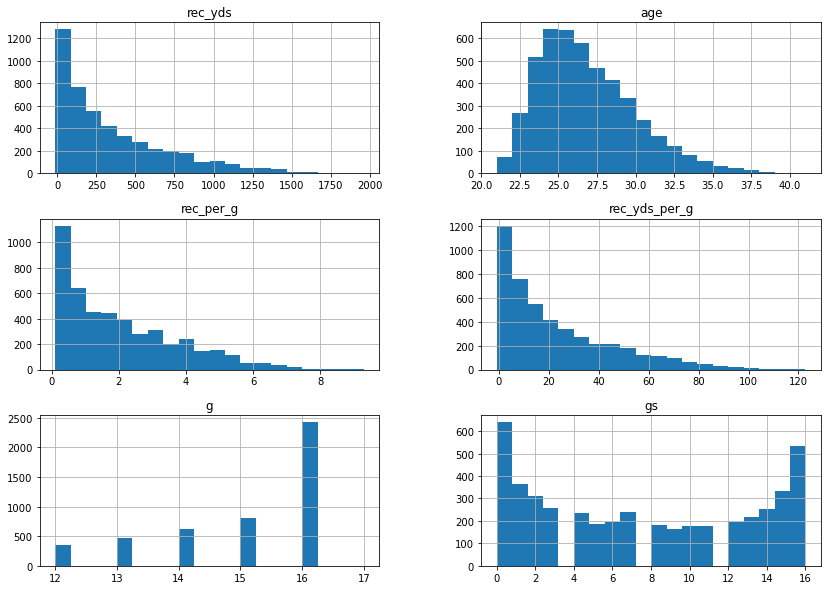

In [19]:
df_more_than_12_games[['rec_yds', 'age','rec_per_g', 'rec_yds_per_g', 'g', 'gs']].hist(bins = 20, figsize=(14,10));

That did not drop as many records as expected.  Lets say we only want to look at starters how does this change things.

In [20]:
df_start_4_or_more = df[df['gs'] >= 4]

In [21]:
df_start_4_or_more.describe()

,year,age,g,gs,rec,catch_pct,rec_yds,rec_yds_per_rec,rec_td,rec_first_down,rec_long,rec_per_g,rec_yds_per_g,height_float
count,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000
mean,2012.108153,26.719357,14.205768,10.265391,35.911259,65.614725,422.206323,10.565613,2.628674,20.422352,37.723794,2.525735,29.523128,6.133828
std,4.317105,3.260234,2.581129,4.137278,26.267522,14.013521,361.579620,4.343962,2.901900,17.992815,20.996049,1.726884,23.923413,0.228207
min,2005.000000,21.000000,4.000000,4.000000,1.000000,0.000000,-16.000000,-16.000000,0.000000,0.000000,-16.000000,0.100000,-2.700000,5.500000
25%,2008.000000,24.000000,13.000000,7.000000,15.000000,56.500000,124.250000,8.000000,0.000000,6.000000,22.000000,1.100000,9.500000,6.000000
50%,2012.000000,26.000000,15.000000,10.000000,31.000000,64.900000,327.500000,10.700000,2.000000,15.500000,35.000000,2.300000,24.100000,6.166667
75%,2016.000000,29.000000,16.000000,14.000000,53.000000,73.075000,640.750000,13.200000,4.000000,32.000000,52.000000,3.700000,45.400000,6.333333
max,2019.000000,41.000000,17.000000,16.000000,149.000000,100.000000,1964.000000,43.000000,23.000000,93.000000,99.000000,9.300000,122.800000,6.750000


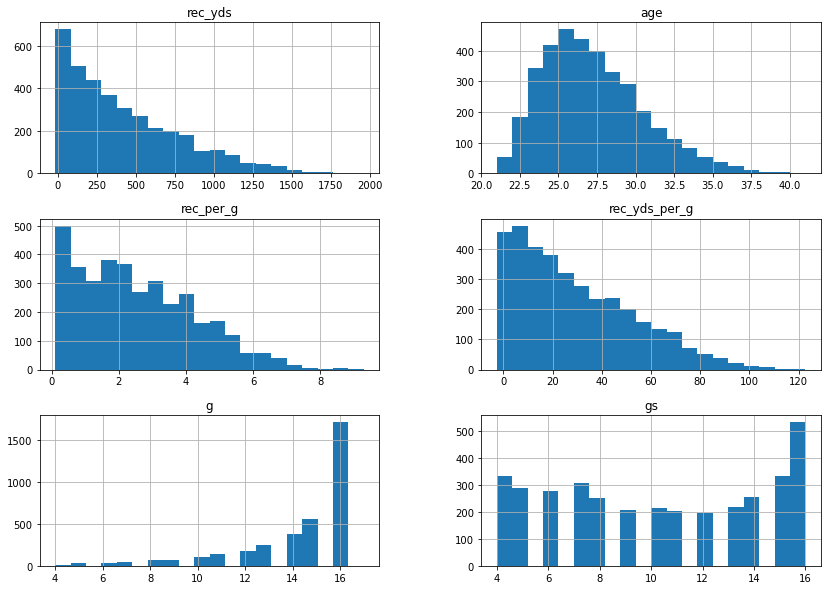

In [22]:
df_start_4_or_more[['rec_yds', 'age','rec_per_g', 'rec_yds_per_g', 'g', 'gs']].hist(bins = 20, figsize=(14,10));

What does the average yardes look like for starters of more then 12 games?

In [23]:
df[(df['gs'] >= 14) & (df['rec_yds'] < 50) ]

,position,year,player_url,player,team,age,pos,g,gs,targets,...,rec_td,rec_first_down,rec_long,rec_yds_per_tgt,rec_per_g,rec_yds_per_g,fumbles,heigh,weight,height_float
355,receiving,2005,/players/V/VrabMi20.htm,Mike Vrabel,NWE,30,RILB,16.0,16.0,3,...,3.0,3.0,2.0,1.3,0.2,0.3,0,6-4,261lb,6.333333
362,receiving,2005,/players/B/BrueMa00.htm,Mark Bruener,HOU,33,TE,16.0,15.0,4,...,0.0,1.0,19.0,5.5,0.1,1.4,0,6-4,260lb,6.333333
399,receiving,2005,/players/F/FainJe20.htm,Jeff Faine,CLE,24,C,14.0,14.0,1,...,0.0,0.0,-1.0,-1.0,0.1,-0.1,0,6-3,291lb,6.250000
409,receiving,2005,/players/M/ManuVi20.htm,Vince Manuwai,JAX,25,LG,16.0,16.0,1,...,0.0,0.0,-1.0,-1.0,0.1,-0.1,0,6-2,312lb,6.166667
419,receiving,2005,/players/R/RoosMi20.htm,Michael Roos,TEN,23,RT,16.0,16.0,1,...,0.0,0.0,-7.0,-7.0,0.1,-0.4,0,6-7,313lb,6.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,receiving,2019,/players/D/DeitMi00.htm,Michael Deiter,MIA,23,LG,16.0,15.0,1,...,0.0,0.0,0.0,0.0,0.1,0.0,0,6-6,310lb,6.500000
6774,receiving,2019,/players/M/McGaKa00.htm,Kaleb McGary,ATL,24,RT,16.0,16.0,1,...,0.0,0.0,-3.0,-3.0,0.1,-0.2,0,6-6,306lb,6.500000
6796,receiving,2019,/players/V/VeaxVi00.htm,Vita Vea,TAM,24,NT,16.0,16.0,1,...,1.0,1.0,1.0,1.0,0.1,0.1,0,6-4,347lb,6.333333
6798,receiving,2019,/players/W/WatsDe00.htm,Deshaun Watson *,HOU,24,QB,15.0,15.0,1,...,1.0,1.0,6.0,6.0,0.1,0.4,10,6-2,220lb,6.166667


In [24]:
df[(df['gs'] >= 14) & (df['rec_yds'] < 50) ]['pos'].unique()

array(['RILB', 'TE', 'C', 'LG', 'RT', 'QB', 'RCB', 'LCB', 'RDE', 'LOLB',
       'RB', 'FS', 'LT', 'NT', 'RG', 'LDE', 'LDT'], dtype=object)

So it looks like games played is not going to be helpful in finding just the standard recivers.  Going to look at recs per game.

In [25]:
df_2_recs_per_game = df[df['rec_per_g'] >= 3]

In [26]:
df_2_recs_per_game.describe()

,year,age,g,gs,rec,catch_pct,rec_yds,rec_yds_per_rec,rec_td,rec_first_down,rec_long,rec_per_g,rec_yds_per_g,height_float
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2012.438456,26.785762,13.738523,11.159015,59.728543,64.766401,731.758483,12.091018,4.564870,35.805722,49.807718,4.321823,52.522156,6.092648
std,4.222984,3.369699,3.474296,4.749588,22.239785,9.361594,332.963829,2.821589,3.214422,16.804176,18.231852,1.080213,18.504679,0.229251
min,2005.000000,21.000000,1.000000,0.000000,3.000000,37.500000,5.000000,1.700000,0.000000,0.000000,4.000000,3.000000,5.000000,5.500000
25%,2009.000000,24.000000,13.000000,8.000000,48.000000,58.100000,501.000000,10.300000,2.000000,24.000000,36.000000,3.400000,38.500000,5.916667
50%,2013.000000,26.000000,15.000000,13.000000,58.000000,64.300000,702.000000,12.100000,4.000000,35.000000,48.000000,4.100000,50.100000,6.083333
75%,2016.000000,29.000000,16.000000,15.000000,73.000000,70.500000,953.500000,13.900000,6.000000,46.000000,63.000000,5.000000,64.750000,6.250000
max,2019.000000,37.000000,17.000000,16.000000,149.000000,100.000000,1964.000000,24.800000,23.000000,93.000000,99.000000,9.300000,122.800000,6.583333


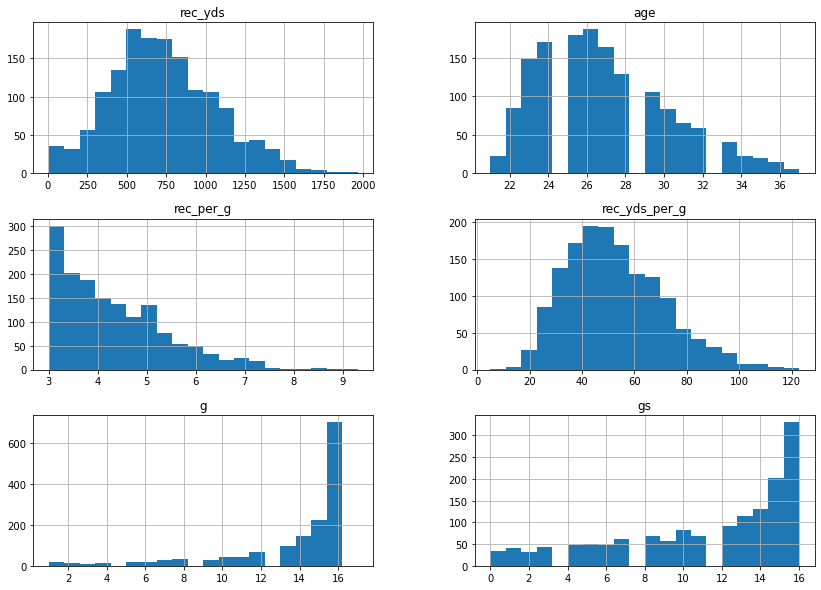

In [27]:
df_2_recs_per_game[['rec_yds', 'age',
                    'rec_per_g', 'rec_yds_per_g', 'g', 
                    'gs']].hist(bins = 20, figsize=(14,10));

How does age relate to yearly yards?  I am going to stick with this condensed data 

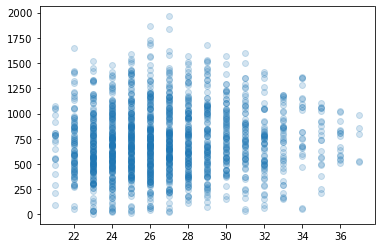

In [28]:
plt.scatter(df_2_recs_per_game['age'], df_2_recs_per_game['rec_yds'], alpha=.2)

Hard to tell if there is a difference.  Lets look at some histograms of under 29 and 29 and over

In [29]:
u_29_mask = df_2_recs_per_game['age'] < 29

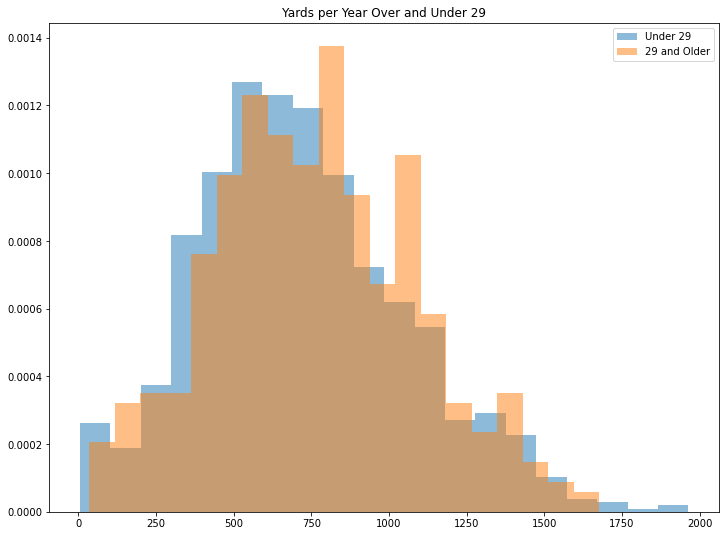

In [30]:
fig, ax = plt.subplots(figsize=(12,9))
ax.hist(df_2_recs_per_game[u_29_mask]['rec_yds'], density=True, bins = 20, alpha=.5, label='Under 29')
ax.hist(df_2_recs_per_game[~u_29_mask]['rec_yds'], density=True, bins = 20, alpha=.5, label='29 and Older')
ax.set_title('Yards per Year Over and Under 29')
ax.legend();

I am unhappy with the different bin edges so I want to redue them with my own set bin edges.

Text(0.5, 1.0, 'Yards per Year Over and Under 29')

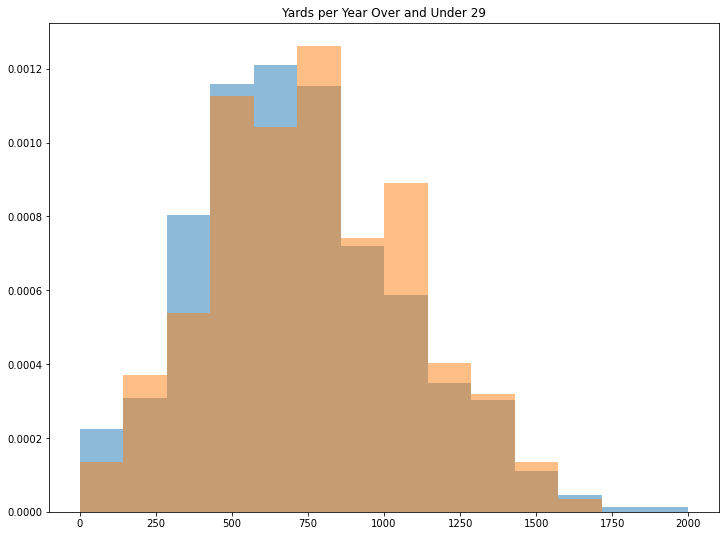

In [31]:
bin_edges = np.linspace(0,2000,15)

fig, ax = plt.subplots(figsize=(12,9))
ax.hist(df_2_recs_per_game[u_29_mask]['rec_yds'], density=True, bins = bin_edges, alpha=.5, label='Under 29')
ax.hist(df_2_recs_per_game[~u_29_mask]['rec_yds'], density=True, bins = bin_edges, alpha=.5, label='29 and Older')
ax.set_title('Yards per Year Over and Under 29')

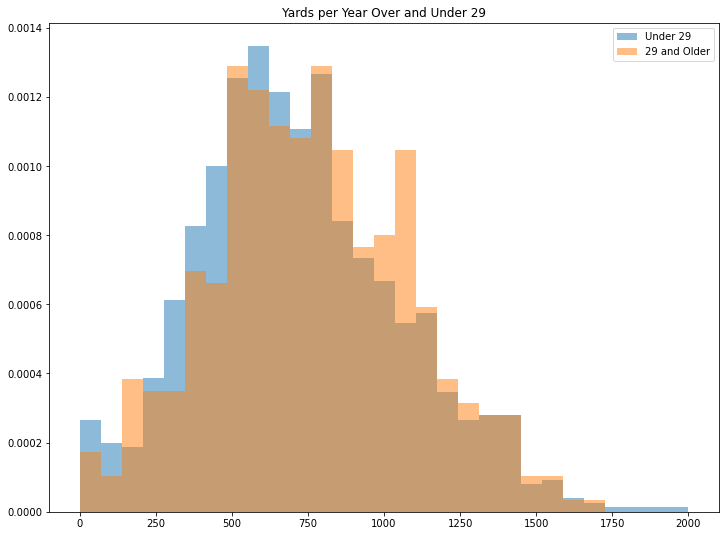

In [32]:
bin_edges = np.linspace(0,2000,30)

fig, ax = plt.subplots(figsize=(12,9))
ax.hist(df_2_recs_per_game[u_29_mask]['rec_yds'], density=True, bins = bin_edges, alpha=.5, label='Under 29')
ax.hist(df_2_recs_per_game[~u_29_mask]['rec_yds'], density=True, bins = bin_edges, alpha=.5, label='29 and Older')
ax.set_title('Yards per Year Over and Under 29')
ax.legend();

This is not looking good for a test.  There does seem to be a slight left and right sque so we can check if there is a different 
$H_0$ = The mean average yards for people 29 and older is the same as those 28 and younger
$H_a$ = They are not the same

I will use a welches T test as I am going to assume they will have different variences.

I will set the significence level at 0.05.


In [33]:
from scipy.stats import ttest_ind

In [34]:
ttest_ind(df_2_recs_per_game[u_29_mask]['rec_yds'],
          df_2_recs_per_game[~u_29_mask]['rec_yds'], equal_var=False)

Ttest_indResult(statistic=-2.01829656045097, pvalue=0.043907303667759856)

It looks as if I can reject the null hypothesis.  The average yards per year for players 29 and older is higher then 28 and younger.  There could be several reasons for this.  One of which is you do not stay in the leage if you are not good. 

In [35]:
print("Number of players 29 and older: {} and a Mean of: {}"
      .format(u_29_mask.sum(), df_2_recs_per_game[u_29_mask]['rec_yds'].mean() ))
print("Number of players 29 and older: {} and a Mean of: {}"
      .format(len(u_29_mask)-u_29_mask.sum(), df_2_recs_per_game[~u_29_mask]['rec_yds'].mean()))

Number of players 29 and older: 1087 and a Mean of: 721.1646734130635
Number of players 29 and older: 416 and a Mean of: 759.4399038461538


## Does hight play a roll in receptions yards or touchdowns?   

First need to clean the height column to a numeric value.

Average height 6.094569426064806


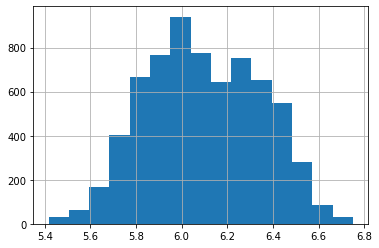

In [40]:
df.height_float.hist(bins=15)
print("Average height {}".format(df.height_float.mean()))

Average height 6.092648037258817


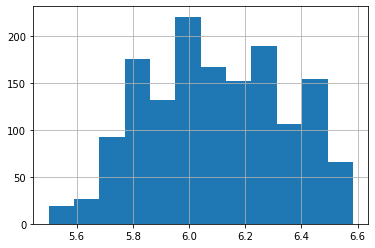

In [39]:
df_2_recs_per_game.height_float.hist(bins=12)
print("Average height {}".format(df_2_recs_per_game.height_float.mean()))

In [41]:
yrds_over_6_ft = df_2_recs_per_game[df_2_recs_per_game['height_float'] > 6]['rec_yds']
yrds_under_6_ft = df_2_recs_per_game[df_2_recs_per_game['height_float'] <= 6]['rec_yds']

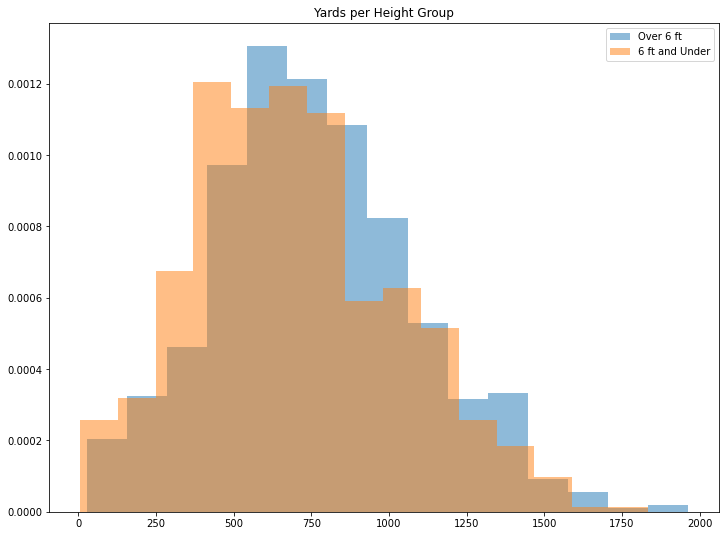

In [44]:
bin_edges = np.linspace(0,2000,30)

fig, ax = plt.subplots(figsize=(12,9))
ax.hist(yrds_over_6_ft, density=True, bins = 15, alpha=.5, label='Over 6 ft')
ax.hist(yrds_under_6_ft, density=True, bins = 15, alpha=.5, label='6 ft and Under')
ax.set_title('Yards per Height Group')
ax.legend();

In [45]:
ttest_ind(yrds_over_6_ft, yrds_under_6_ft, equal_var=False)

Ttest_indResult(statistic=3.7422388921785488, pvalue=0.0001896406791520901)

In [21]:
df = pd.DataFrame(list(clean_player.find({'position':'passing'},{'_id':0})))

In [22]:
df.head()

,position,year,player_url,player,team,age,pos,g,gs,qb_rec,...,pass_sacked,pass_sacked_yds,pass_net_yds_per_att,pass_adj_net_yds_per_att,pass_sacked_perc,comebacks,gwd,heigh,weight,qbr
0,passing,2005,/players/F/FavrBr00.htm,Brett Favre,GNB,36,QB,16,16,4-12-0,...,24,170,5.88,4.45,3.8,1,1,6-2,222lb,NaN
1,passing,2005,/players/C/CollKe00.htm,Kerry Collins,OAK,33,QB,15,15,4-11-0,...,39,261,5.79,5.56,6.5,1,1,6-5,247lb,NaN
2,passing,2005,/players/M/MannEl00.htm,Eli Manning,NYG,24,QB,16,16,11-5-0,...,28,184,6.12,5.63,4.8,1,2,6-5,220lb,NaN
3,passing,2005,/players/B/BradTo00.htm,Tom Brady *,NWE,28,QB,16,16,10-6-0,...,26,188,7.05,6.86,4.7,3,4,6-4,225lb,NaN
4,passing,2005,/players/P/PalmCa00.htm,Carson Palmer*,CIN,26,QB,16,16,11-5-0,...,19,105,7.07,7.26,3.6,1,3,6-5,235lb,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   position                  1460 non-null   object
 1   year                      1460 non-null   int64 
 2   player_url                1460 non-null   object
 3   player                    1460 non-null   object
 4   team                      1460 non-null   object
 5   age                       1460 non-null   object
 6   pos                       1460 non-null   object
 7   g                         1460 non-null   object
 8   gs                        1460 non-null   object
 9   qb_rec                    1460 non-null   object
 10  pass_cmp                  1460 non-null   object
 11  pass_att                  1460 non-null   object
 12  pass_cmp_perc             1460 non-null   object
 13  pass_yds                  1460 non-null   object
 14  pass_td                 